In [11]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.decomposition
import scipy.sparse as ss
%matplotlib inline

In [3]:
df = pd.read_csv("data/ml-latest-small/ratings.csv")
df['timestamp'] = pd.to_datetime(df.timestamp, unit = 's')
df

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


In [4]:
#train/validation splinting
trainSet, valSet = sklearn.model_selection.train_test_split(df.iloc[:,:3])
trainSet = ss.coo_matrix((trainSet['rating'], (trainSet['userId'], trainSet['movieId'])), shape=(df['userId'].max()+1,df['movieId'].max()+1))
valSet = ss.coo_matrix((valSet['rating'], (valSet['userId'], valSet['movieId'])), shape=(df['userId'].max()+1,df['movieId'].max()+1))

In [21]:
print(trainSet)

  (274, 33004)	2.5
  (448, 6314)	2.0
  (221, 6639)	4.0
  (95, 176)	4.0
  (489, 2628)	1.0
  (590, 2640)	4.0
  (425, 1393)	3.0
  (414, 5568)	4.0
  (298, 8636)	2.5
  (567, 2628)	0.5
  (318, 35836)	3.5
  (317, 78574)	3.0
  (249, 58103)	4.0
  (68, 1590)	2.0
  (68, 47200)	2.0
  (321, 153)	5.0
  (411, 592)	3.0
  (577, 2076)	3.0
  (495, 4545)	4.0
  (482, 1584)	3.0
  (187, 30810)	4.0
  (136, 15)	5.0
  (177, 2719)	3.0
  (191, 16)	4.0
  (200, 2248)	3.5
  :	:
  (566, 377)	4.0
  (140, 5902)	3.0
  (288, 2687)	3.0
  (139, 4734)	1.5
  (281, 8361)	3.0
  (191, 293)	5.0
  (564, 48385)	3.0
  (452, 2006)	4.0
  (570, 410)	2.0
  (333, 3646)	2.0
  (414, 454)	3.0
  (274, 59306)	1.0
  (465, 1092)	4.0
  (210, 5952)	4.0
  (599, 4553)	3.5
  (122, 2918)	4.5
  (448, 148709)	2.0
  (170, 150)	3.0
  (474, 1982)	3.5
  (453, 344)	4.0
  (373, 292)	3.0
  (181, 981)	3.0
  (230, 364)	3.0
  (414, 3441)	4.0
  (438, 4700)	3.5


In [6]:
trainSet.todense() #row 0 is all zeros as  userId start from 1, properly not a good practise though

matrix([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 4. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 2.5, 2. , ..., 0. , 0. , 0. ],
        [0. , 3. , 0. , ..., 0. , 0. , 0. ],
        [0. , 5. , 0. , ..., 0. , 0. , 0. ]])

In [7]:
#I cannot find a pre-defined method to calculate validation loss
def validation(W,H, valSet):
    error = 0
    for (row, col, data) in zip(valSet.row, valSet.col, valSet.data):
        error += abs(np.dot(W[row], H[:,col]) - data)
    return error

In [9]:
error = np.zeros(10)
trainloss = np.zeros(10)
for i in range(1,10):
    model = sklearn.decomposition.NMF(n_components=2*i, init = "nndsvd", alpha = 1, max_iter = 1000)
    W = model.fit_transform(trainSet)
    H = model.components_
    trainloss[i] = model.reconstruction_err_
    error[i] = validation(W, H, valSet)

Text(0.5, 0.98, 'loss against n_components(hyperparameter)')

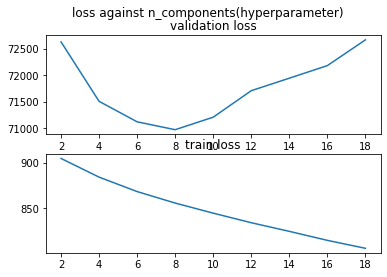

In [19]:
fig, axes = plt.subplots(2)
axes[0].plot([2*i for i in range(1,10)],error[1:])
axes[0].set_title('validation loss')
axes[1].plot([2*i for i in range(1,10)],trainloss[1:])
axes[1].set_title('train loss')
fig.suptitle("loss against n_components(hyperparameter)")

